In [1]:
#import libraries

import os
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Data preparation
dataset_dir= r'D:\Intel PC\Computing Research Club (CRC)\Machine Learning\Artificial Neural Newtork with Python\crc_skin_data'
input_shape=(224, 224, 3)
batch_size=8
num_classes=2

In [3]:
#Data augmentation
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

test_datagen=ImageDataGenerator(
    rescale=1./255)

In [4]:
#Generate the train dataset, validation dataset and test dataset
train_generator=train_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'train'),
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary', #skin has two classes: benign and malignant
    subset='training')

validation_generator=train_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'train'),
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary', #skin has two classes: benign and malignant
    subset='validation')

test_generator=test_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'test'),
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary' #skin has two classes: benign and malignant
)

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [5]:
#building the model: VGGNet 16: 16 layers - 13 Conv layers, 5 MaxPooling Layer and 3 Fully-connected (FC) layers
model=Sequential()
#Add the 13 convolutional layers and 5 maxpooling layer for VGG16

model.add(Conv2D(64, (3, 3), padding ='same', input_shape=input_shape))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding ='same'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding ='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding ='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding ='same'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding ='same'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding ='same'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), padding ='same'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding ='same'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding ='same'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), padding ='same'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding ='same'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding ='same'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Flatten the layers
model.add(Flatten())

#Add the fully connected layers
model.add(Dense(4096, activation='relu')) # first FC
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu')) #second FC
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) # third FC

In [6]:
#compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
#Train the model
history=model.fit(train_generator, epochs=2, validation_data=(validation_generator), verbose=1)


Epoch 1/2
50/50 [==============================] - 17s 347ms/step - loss: 10.8675 - accuracy: 0.4475 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/2
50/50 [==============================] - 12s 244ms/step - loss: 0.6941 - accuracy: 0.4875 - val_loss: 0.6971 - val_accuracy: 0.5000


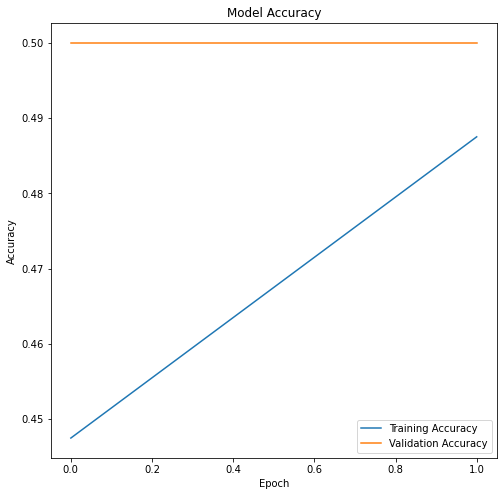

In [8]:
#Training accuracy and validation accuracy graph
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc ='lower right')
plt.show()

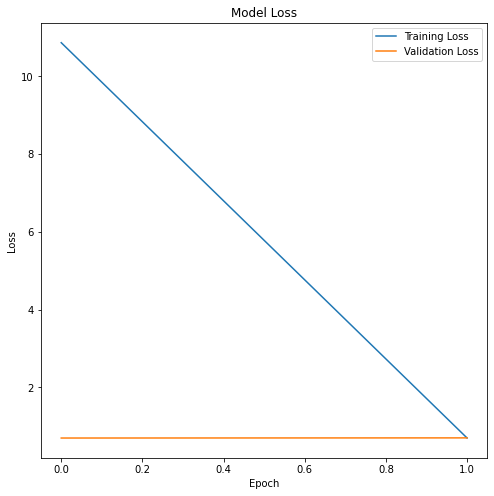

In [9]:
#Trainig loss and validation loss graph
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc ='upper right')
plt.show()

In [10]:
# Evaluate the model on the testing dataset
test_loss, test_acc = model.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

13/13 [==============================] - 1s 86ms/step
Test loss: 0.6931781768798828
Test accuracy: 0.5
